# 2010 - 2020
- 년도별 도시가스 / 프로판 판매량 비율
   - 프로판 가스보다 도시가스 사용량이 점점 늘어나는가
- 년도별 도시가스, 년도별 프로판 사용량 상관도
   - 도시가스 사용량이 점점 많아지고 있는가
   - 프로판 가스 사용량은 점점 줄어들고 있는가
- 도시가스 
   - 년도별 겨울(10,11,12,1,2,3) 평균사용량 / 비겨울(4,5,6,7,8,9) 평균사용량
   -> test (평균 사용량에 차이가 있는가)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
np.set_printoptions(precision=5,suppress=True)


def my_split(s):
    block_start = False
    start_index = 0
    ret_list=[]
    for i, c in enumerate(s):
        if block_start==False:
            if c==',':
                ret_list.append(s[start_index:i])
                start_index=i+1
            elif c=='"':
                block_start=True
                start_index = i
        else:
            if c=='"':
                block_start=False
    if s[-1]!=',':
        ret_list.append(s[start_index:])
    return ret_list

def split_len(data_list):
    len_list=[]
    for e in data_list:
        len_list.append(len(e))
    print(set(len_list))
    if len(set(len_list))>1:
        for i in set(len_list):
            print(i, len_list.count(i))
    return set(len_list)

In [9]:
csv_data = []
with open('가스공급량_20230217170925.csv') as f:
    for line in f:
        csv_data.append(line[:-1].split(','))
t = set()

for e in csv_data:
    t.add(len(e))
#print(t)

np_data = np.array(csv_data[2:])
np_data = np_data[:, 2:].astype(np.int64)
print(np_data[:3])

[[     1 179086    311   8775     64  26227]
 [     1 139496    311   8745     64  23518]
 [     1 143581    311   8092     64  23959]]


(132, 6)
[  0  12  24  36  48  60  72  84  96 108 120]
[[     12 1275714    3732   91657     768  289391]
 [     12 1297954    3492  107350     804  282017]
 [     12 1359726    3358  104294     852  268913]]


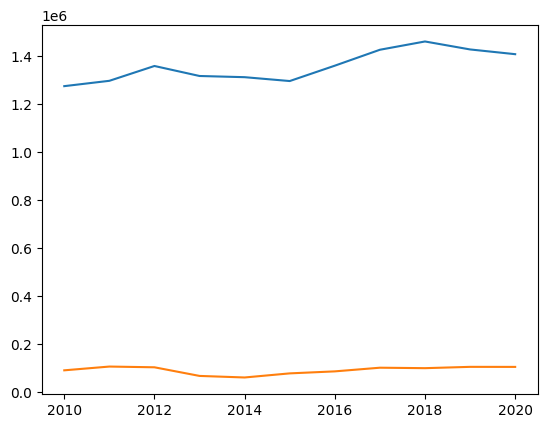

In [30]:
print(np_data.shape)
print(np.arange(0,130,12))
by_year = np.add.reduceat(np_data,np.arange(0,130,12)) 
print(by_year[:3])


total_gas = by_year[:,1] + by_year[:,3]
ln_gas = by_year[:,1] / total_gas
lp_gas = by_year[:,3] / total_gas

_,axe = plt.subplots()
axe.plot(np.arange(2010,2021),by_year[:,1])  # 연도별 도시가스 총 사용량

axe.plot(np.arange(2010,2021),by_year[:,3]) # 연도별 프로판가스 총 사용량

#axe.plot(np.arange(2010,2021),by_year[:,1]/ 12)  # 연도별 도시가스 평균 사용량
#연도별 도시가스 + 프로판 사용량 대비, 도시가스 사용량 비율
#print(axe.plot(np.arange(2010,2021),ln_gas))  

#print(axe.plot(np.arange(2010,2021),lp_gas))

[[1.      0.53495]
 [0.53495 1.     ]]


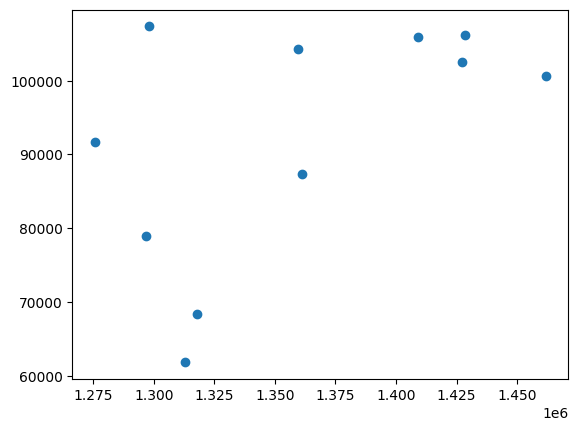

In [33]:
#상관도

print(np.corrcoef(by_year[:,1],by_year[:,3]))

_,axe = plt.subplots()
axe.scatter(by_year[:,1],by_year[:,3])

In [41]:
#print(np_data[:10])

by_season = np.add.reduceat(np_data[3:],np.arange(0,130,6))
print(by_season[::2])

print('**********')

summers_sum = by_season[::2] # 여름
print(summers_sum[:2])
winters_sum = by_season[1::2] # 겨율

#연도별 겨울(10,11,12,01,02,03) 평균사용량
#연도별 여름(04,05,06,07,08,09) 평균사용량

[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]
 [     6 477033   1680  43103    426 130817]
 [     6 477884   1678  28594    414 130872]
 [     6 469695   1654  25459    372 122912]
 [     6 472679   1656  35238    399 117091]
 [     6 475642   1662  40700    420 114275]
 [     6 493697   1590  41456    390 107347]
 [     6 500237   1608  40337    396 103102]
 [     6 517524   1596  40952    396  96907]
 [     6 493142   1566  42150    390  86955]]
**********
[[     6 461211   1866  41722    384 142333]
 [     6 462670   1746  53486    402 140882]]


In [48]:
#2010년 여름 평균 사용량

lp_gas2010_summer = np_data[3:9,3]
print(lp_gas2010_summer)
#print(summers_sum[0])
#print(np_data[3:9])

#2010 - 2011년 겨울 평균 사용량
lp_gas2010_winter = np_data[9:15,3]
print(lp_gas2010_winter)
#print(winters_sum[0])
#print(np_data[9:15])

# ttest 귀무가설, 두개의 mean 값은 같은 모집단에서 나온것. 
# 두개의 mean값을 같은 것으로 보아야 한다

stats.ttest_ind(lp_gas2010_summer,lp_gas2010_winter)

[8105 7787 7137 5928 6023 6742]
[ 6366  8560  9397 12137 10072 13017]


Ttest_indResult(statistic=-2.8201037966265856, pvalue=0.01815747444106195)

In [51]:
# 2011년 여름, 2011-2012년 겨울 도시가스 사용량 ttest_ind
ln_gas2011_summer = np_data[15:21,1]  # 도시가스 인덱스 1

ln_gas2011_winter = np_data[21:27,1] # 도시가스 인덱스 1

stats.ttest_ind(ln_gas2011_summer,ln_gas2011_winter)

Ttest_indResult(statistic=-3.5606327383239305, pvalue=0.005175795051470046)

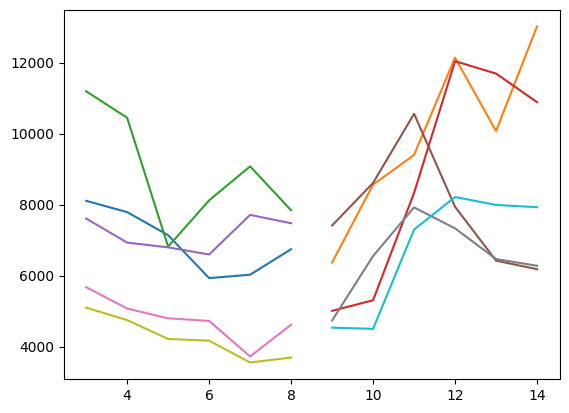

In [54]:
# 수식으로 표현
_,axe = plt.subplots()
year = 2010
gas_index = 3
for i in range(0,10,2):
    j = 3+6*i
    summer = np_data[j:j+6]
    winter = np_data[j+6:j+12]
    axe.plot(np.arange(3,9), summer[:,gas_index])
    axe.plot(np.arange(9,15), winter[:,gas_index])